I would like to calculate the correlation between resolution (which is determined by the `c` value in our simulations) and the VI index of the inferred MCCs - I do this by simulating ARGs with a random resolution rate (by random sampling of the `c` parameter),using TreeKnit to infer MCCs

In [20]:
using TreeKnit
using TreeTools
using ARGTools
using MTKTools
using Plots
using StatsBase

Now I add some packages for analysis

In [21]:
import Pkg; Pkg.add("Statistics")
using Statistics

   Resolving package versions...
  No Changes to `~/Documents/MTKTools/Project.toml`
  No Changes to `~/Documents/MTKTools/Manifest.toml`


In [22]:
Pkg.add(url="https://github.com/diegozea/ROC.jl", rev="master")
import Pkg; Pkg.add(url="https://github.com/PierreBarrat/TreeAlgs")
import Pkg; Pkg.add(url="https://github.com/PierreBarrat/TestRecombTools")
using TestRecombTools

    Updating git-repo `https://github.com/diegozea/ROC.jl`
   Resolving package versions...
  No Changes to `~/Documents/MTKTools/Project.toml`
  No Changes to `~/Documents/MTKTools/Manifest.toml`
    Updating git-repo `https://github.com/PierreBarrat/TreeAlgs`
   Resolving package versions...
  No Changes to `~/Documents/MTKTools/Project.toml`
  No Changes to `~/Documents/MTKTools/Manifest.toml`
    Updating git-repo `https://github.com/PierreBarrat/TestRecombTools`
   Resolving package versions...
  No Changes to `~/Documents/MTKTools/Project.toml`
  No Changes to `~/Documents/MTKTools/Manifest.toml`


We first start with Kingman

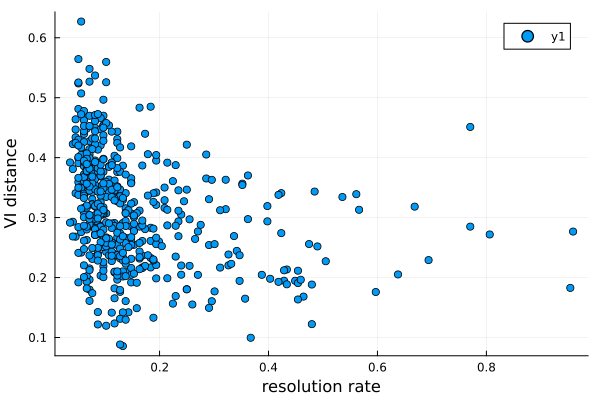

In [23]:
function check_VI(;repeat=500, remove=true, rec=0.1)
    res_value = []
    VI = []
    for r in 1:repeat 
        trees, arg = get_trees(8, 100, remove=remove, c=rand(), ρ = rec, simtype = :kingman);
        rand_ = sample(1:8, 2, replace=false)
        rMCCs = MTKTools.get_real_MCCs(2, arg)
        res = [TreeTools.resolution_value(t) for t in trees[rand_]]
        oa = TreeKnit.OptArgs()
        mCC = TreeKnit.runopt(oa, trees[rand_][1], trees[rand_][2]; output = :mccs)
        push!(res_value, sum(res)/2)
        push!(VI, TestRecombTools.varinfo_similarity(rMCCs[1], mCC))
    end
    return res_value, VI
end

res_value, VI = check_VI()
plot(scatter(res_value, VI, ylabel="VI distance", xlabel="resolution rate"))

It does appear that there is a negative correlation between how resolved a tree is and the VI index. A high VI value means that there is a larger distance between the inferred and true MCCs - meaning that a lower VI for higher resolution implies better inference at higher resolution rates.

In [24]:
print(cor(res_value, VI))

-0.3017702548448867

I want to see if the correlation (or relationship between the resolution rate and the VI distance) is in anyway effected by the recombination rate.

In [31]:
ran = -4:0.5:0
res_values = Dict()
VI_values = Dict() 
calc_cor_values = []
for rec_rate in ran
    rec = 10.0^rec_rate
    res_values[rec_rate], VI_values[rec_rate] = check_VI(;rec=rec)
    calc_cor = cor(res_values[rec_rate], VI_values[rec_rate])
    println("For recombination rate: 10^"*string(rec_rate)*" the correlation between resolution and VI is "*string(calc_cor))
    push!(calc_cor_values, calc_cor)
end


For recombination rate: 10^-4.0 the correlation between resolution and VI is -0.03919208381234095
For recombination rate: 10^-3.5 the correlation between resolution and VI is 0.025917896340819962
For recombination rate: 10^-3.0 the correlation between resolution and VI is 0.058181758810827
For recombination rate: 10^-2.5 the correlation between resolution and VI is 0.03424333269079398
For recombination rate: 10^-2.0 the correlation between resolution and VI is 0.006927616056905242
For recombination rate: 10^-1.5 the correlation between resolution and VI is -0.045656206848844826
For recombination rate: 10^-1.0 the correlation between resolution and VI is -0.060290339250754714
For recombination rate: 10^-0.5 the correlation between resolution and VI is -0.3492982975296719
For recombination rate: 10^0.0 the correlation between resolution and VI is -0.48546177614727465


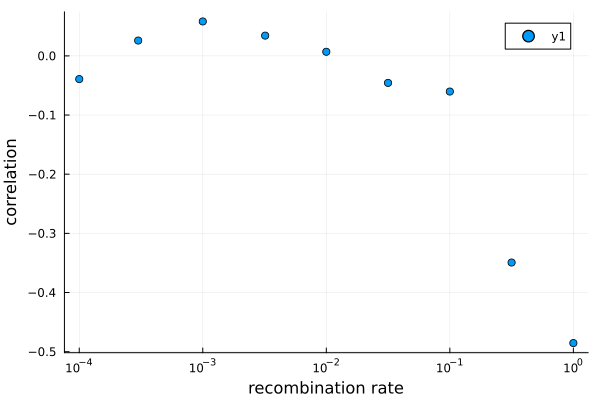

In [32]:
plot(scatter([round(10^e, digits=4) for e in ran], calc_cor_values, ylabel="correlation", xlabel="recombination rate"), xaxis= :log10)

Now we do the same for flu

In [37]:
function check_VI(;repeat=500, remove=true, rec=0.1)
    res_value = []
    VI = []
    for r in 1:repeat 
        trees, arg = get_trees(8, 100, remove=remove, c=0.2 + 4*rand(), ρ = rec, simtype = :flu);
        rand_ = sample(1:8, 2, replace=false)
        rMCCs = MTKTools.get_real_MCCs(2, arg)
        res = [TreeTools.resolution_value(t) for t in trees[rand_]]
        oa = TreeKnit.OptArgs()
        mCC = TreeKnit.runopt(oa, trees[rand_][1], trees[rand_][2]; output = :mccs)
        push!(res_value, sum(res)/2)
        push!(VI, TestRecombTools.varinfo_similarity(rMCCs[1], mCC))
    end
    return res_value, VI
end

ran = -4:0.5:0
res_values = Dict()
VI_values = Dict() 
calc_cor_values = []
for rec_rate in ran
    rec = 10.0^rec_rate
    res_values[rec_rate], VI_values[rec_rate] = check_VI(;rec=rec)
    calc_cor = cor(res_values[rec_rate], VI_values[rec_rate])
    println("For recombination rate: 10^"*string(rec_rate)*" the correlation between resolution and VI is "*string(calc_cor))
    push!(calc_cor_values, calc_cor)
end

For recombination rate: 10^-4.0 the correlation between resolution and VI is 0.04363592867152797
For recombination rate: 10^-3.5 the correlation between resolution and VI is 0.05412942540303399
For recombination rate: 10^-3.0 the correlation between resolution and VI is -0.0182576701809613
For recombination rate: 10^-2.5 the correlation between resolution and VI is -0.011431055642854302
For recombination rate: 10^-2.0 the correlation between resolution and VI is 0.017894389040268674
For recombination rate: 10^-1.5 the correlation between resolution and VI is 0.0236148308842877
For recombination rate: 10^-1.0 the correlation between resolution and VI is -0.02669192005535234
For recombination rate: 10^-0.5 the correlation between resolution and VI is -0.3758219713357252
For recombination rate: 10^0.0 the correlation between resolution and VI is -0.5136822048502426


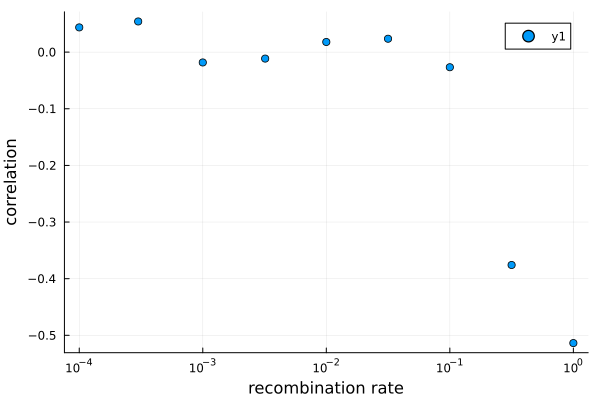

In [38]:
plot(scatter([round(10.0^e, digits=4) for e in ran], calc_cor_values, ylabel="correlation", xlabel="recombination rate"), xaxis= :log10)